# Exploration of Zipfness in Modern Tokenizers
Members: Jack Hanke, Daniel Plotkin, Nicole Birova

In [1]:
# get RoBERTa, GPT-4 tokenizers
from transformers import RobertaTokenizer, AutoTokenizer
import tiktoken

class RoBERTa_Tokenizer:
    def __init__(self):
        self.name = 'RoBERTa Tokenizer'
        self.tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base")
    def tokenize(self, text_str: str):
        return self.tokenizer(text_str)['input_ids']
        return self.tokenizer.encode(text_str[:512])
        return self.tokenizer.encode(text_str)
    def detokenize(self, tokens: list[int]):
        return self.tokenizer.decode(tokens)

class GPT4_Tokenizer:
    def __init__(self):
        self.name = 'GPT 4 Tokenizer'
        self.tokenizer = tiktoken.encoding_for_model("gpt-4o")
    def tokenize(self, text_str: str):
        return self.tokenizer.encode(text_str, disallowed_special=())
    def detokenize(self, tokens: list[int]):
        return self.tokenizer.decode(tokens)

roberta_tokenizer = RoBERTa_Tokenizer()
gpt_tokenizer = GPT4_Tokenizer()

text_str = "Hello world"
assert roberta_tokenizer.detokenize(roberta_tokenizer.tokenize(text_str=text_str))
assert gpt_tokenizer.detokenize(gpt_tokenizer.tokenize(text_str=text_str))


/Users/danielplotkin/Documents/MSAI/courses/spring_2025/nlp-sem/zipfian-repo/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
print(roberta_tokenizer.tokenizer.vocab_size)
print(gpt_tokenizer.tokenizer.n_vocab)

50265
200019


In [3]:
# 
def increment_dict(dictionary: dict, key: str):
    try:
        dictionary[key] += 1
    except KeyError:
        dictionary[key] = 1

# 
def sort_dictionary(dictionary: dict):
    return {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

# 
# increment frequency for a given item (sentence) and a given tokenizer
def increment_frequency(dictionary:dict, item: str, tokenizer):
    # if no tokenizer, increment word freq
    if tokenizer is None:
        for count, word in enumerate(item.split()):
            increment_dict(dictionary=dictionary, key=word)
        return count+1
    
    # increment token freq
    tokens = tokenizer.tokenize(item)
    for count, token in enumerate(tokens):
        increment_dict(dictionary=dictionary, key=token)
    return count+1

# 
def normalize_dictionary(dictionary: dict, denominator: int):
    return_dictionary = {}
    for key, value in dictionary.items():
        return_dictionary[key] = value/denominator
    
    return return_dictionary


In [ ]:
# get bookscorpus from: "https://storage.googleapis.com/huggingface-nlp/datasets/bookcorpus/bookcorpus.tar.bz2"
from tqdm import tqdm

# experiment filenames
def experiment(filenames: list[str]):
    word_freq_dict, gpt_token_freq_dict, roberta_token_freq_dict = {}, {}, {}
    word_count, gpt_token_count, roberta_token_count = 0, 0, 0

    for filename in filenames:
        with open(filename, 'r') as f:
            prog_bar = tqdm(f.readlines())
            for line in prog_bar:
                item = str(line)
                word_count += increment_frequency(dictionary=word_freq_dict, item=item, tokenizer=None)
                gpt_token_count += increment_frequency(dictionary=gpt_token_freq_dict, item=item, tokenizer=gpt_tokenizer)
                roberta_token_count += increment_frequency(dictionary=roberta_token_freq_dict, item=item, tokenizer=roberta_tokenizer)

    # 
    sorted_word_freq_dict = sort_dictionary(dictionary=word_freq_dict)
    word_frequencies = normalize_dictionary(dictionary=sorted_word_freq_dict, denominator=word_count)

    sorted_gpt_token_freq_dict = sort_dictionary(dictionary=gpt_token_freq_dict)
    gpt_token_frequencies = normalize_dictionary(dictionary=sorted_gpt_token_freq_dict, denominator=gpt_token_count)

    sorted_roberta_token_freq_dict = sort_dictionary(dictionary=roberta_token_freq_dict)
    roberta_token_frequencies = normalize_dictionary(dictionary=sorted_roberta_token_freq_dict, denominator=roberta_token_count)

    return word_frequencies, gpt_token_frequencies, roberta_token_frequencies


100%|██████████| 34004228/34004228 [38:09<00:00, 14855.38it/s]


In [ ]:
# bookscorpus experiment
# NOTE these are over 2GB each
filenames = [f'data/books_large_p1.txt', f'data/books_large_p2.txt']

bookscorpus_word_frequencies, bookscorpus_gpt_token_frequencies, bookscorpus_roberta_token_frequencies = experiment(filenames=filenames)

In [ ]:
from datasets import load_dataset, Dataset

def get_minipile():
    ds = load_dataset("JeanKaddour/minipile")
    ds.save_to_disk('data/minipile')

README.md:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

(…)-00000-of-00012-6fbcb5acda05b3c0.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

(…)-00001-of-00012-2bb9d088068a84c9.parquet:   0%|          | 0.00/262M [00:00<?, ?B/s]

(…)-00002-of-00012-efb6c8de04272068.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

(…)-00003-of-00012-47006e5a888a9324.parquet:   0%|          | 0.00/275M [00:00<?, ?B/s]

(…)-00004-of-00012-a6a94a0207e8e96c.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

(…)-00005-of-00012-d255c96cd87a0aa7.parquet:   0%|          | 0.00/263M [00:00<?, ?B/s]

(…)-00006-of-00012-89040916c30140e6.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

(…)-00007-of-00012-239b43e016d4ac92.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

(…)-00008-of-00012-3273ba93936ad8ef.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

(…)-00009-of-00012-0b640f47936d940a.parquet:   0%|          | 0.00/264M [00:00<?, ?B/s]

(…)-00010-of-00012-d266658ccbfa0537.parquet:   0%|          | 0.00/270M [00:00<?, ?B/s]

(…)-00011-of-00012-aec474909333c631.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

(…)-00000-of-00001-a2192e61a091cecb.parquet:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

(…)-00000-of-00001-010a6231c4b54d31.parquet:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
ds = load_dataset('data/minipile')

Saving the dataset (0/12 shards):   0%|          | 0/1000000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/500 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

In [25]:
from tqdm import tqdm

# experiment filenames
def minipile_experiment(ds: Dataset):
    word_freq_dict, gpt_token_freq_dict, roberta_token_freq_dict = {}, {}, {}
    word_count, gpt_token_count, roberta_token_count = 0, 0, 0

    prog_bar = tqdm(ds['train'])
    for line in prog_bar:
        item = str(line['text'])
        word_count += increment_frequency(dictionary=word_freq_dict, item=item, tokenizer=None)
        gpt_token_count += increment_frequency(dictionary=gpt_token_freq_dict, item=item, tokenizer=gpt_tokenizer)
        roberta_token_count += increment_frequency(dictionary=roberta_token_freq_dict, item=item, tokenizer=roberta_tokenizer)

    # 
    sorted_word_freq_dict = sort_dictionary(dictionary=word_freq_dict)
    word_frequencies = normalize_dictionary(dictionary=sorted_word_freq_dict, denominator=word_count)

    sorted_gpt_token_freq_dict = sort_dictionary(dictionary=gpt_token_freq_dict)
    gpt_token_frequencies = normalize_dictionary(dictionary=sorted_gpt_token_freq_dict, denominator=gpt_token_count)

    sorted_roberta_token_freq_dict = sort_dictionary(dictionary=roberta_token_freq_dict)
    roberta_token_frequencies = normalize_dictionary(dictionary=sorted_roberta_token_freq_dict, denominator=roberta_token_count)

    return word_frequencies, gpt_token_frequencies, roberta_token_frequencies

minipile_word_frequencies, minipile_gpt_token_frequencies, minipile_roberta_token_frequencies = minipile_experiment(ds = ds)

100%|██████████| 1000000/1000000 [1:25:11<00:00, 195.63it/s]


In [26]:
# save distributions
import pickle

# dataset = 'bookscorpus'
dataset = 'minipile'
with open(f'{dataset}_words.pickle', 'wb') as f:
    pickle.dump(minipile_word_frequencies, f) 
with open(f'{dataset}_gpt4.pickle', 'wb') as f:
    pickle.dump(minipile_gpt_token_frequencies, f) 
with open(f'{dataset}_roberta.pickle', 'wb') as f:
    pickle.dump(minipile_roberta_token_frequencies, f) 

In [1]:
# load distributions
import pickle

# dataset = 'bookscorpus'
dataset = 'minipile'
with open(f'distributions/{dataset}_words.pickle', 'rb') as f:
    minipile_word_frequencies = pickle.load(f) 
with open(f'distributions/{dataset}_gpt4.pickle', 'rb') as f:
    minipile_gpt_token_frequencies = pickle.load(f) 
with open(f'distributions/{dataset}_roberta.pickle', 'rb') as f:
    minipile_roberta_token_frequencies = pickle.load(f) 
dataset = 'bookscorpus'
with open(f'distributions/{dataset}_words.pickle', 'rb') as f:
    bookscorpus_word_frequencies = pickle.load(f) 
with open(f'distributions/{dataset}_gpt4.pickle', 'rb') as f:
    bookscorpus_gpt_token_frequencies = pickle.load(f) 
with open(f'distributions/{dataset}_roberta.pickle', 'rb') as f:
    bookscorpus_roberta_token_frequencies = pickle.load(f) 

In [26]:
# NOTE most common tokens and words!
lim = 100
bookscorpus_word_len = len(bookscorpus_word_frequencies)
bookscorpus_roberta_len = len(bookscorpus_roberta_token_frequencies)
bookscorpus_gpt_len = len(bookscorpus_gpt_token_frequencies)
minipile_word_len = len(minipile_word_frequencies)
minipile_roberta_len = len(minipile_roberta_token_frequencies)
minipile_gpt_len = len(minipile_gpt_token_frequencies)

# print(bookscorpus_word_len)
# print(bookscorpus_roberta_len)
# print(bookscorpus_gpt_len)
# print(minipile_word_len)
# print(minipile_roberta_len)
# print(minipile_gpt_len)

# for i, (key, value) in enumerate(bookscorpus_word_frequencies.items()):
#     # print(key, value)
#     # if i == lim: break
#     if i >= bookscorpus_word_len - lim:
#         print(key, value)
# print('-----------------')
# for i, (key, value) in enumerate(minipile_word_frequencies.items()):
#     # print(key, value)
#     # if i == lim: break
#     if i >= minipile_word_len - lim:
#         print(key, value)

for i, (key, value) in enumerate(bookscorpus_roberta_token_frequencies.items()):
    # if i == lim: break
    if i >= bookscorpus_roberta_len - lim:
        print(roberta_tokenizer.detokenize(key), value)
# print('-----------------')
# for i, (key, value) in enumerate(minipile_roberta_token_frequencies.items()):
#     # if i == lim: break
#     if i >= minipile_roberta_len - lim:
#         print(roberta_tokenizer.detokenize(key), value)

# for i, (key, value) in enumerate(bookscorpus_gpt_token_frequencies.items()):
#     # if i == lim: break
#     if i >= bookscorpus_gpt_len - lim:
#         print(gpt_tokenizer.detokenize([key]), value)
# print('-----------------')
# for i, (key, value) in enumerate(minipile_gpt_token_frequencies.items()):
#     # if i == lim: break
#     if i >= minipile_gpt_len - lim:
#         print(gpt_tokenizer.detokenize([key]), value)

803 1.5310877515400526e-09
linux 1.5310877515400526e-09
ablished 1.5310877515400526e-09
ntax 1.5310877515400526e-09
200000 1.5310877515400526e-09
''. 1.5310877515400526e-09
agonists 1.5310877515400526e-09
 livestream 1.5310877515400526e-09
/. 1.5310877515400526e-09
vertising 1.5310877515400526e-09
enfranch 1.5310877515400526e-09
inances 1.5310877515400526e-09
 conflic 1.5310877515400526e-09
969 1.5310877515400526e-09
ettings 1.5310877515400526e-09
 rgb 1.5310877515400526e-09
-, 1.5310877515400526e-09
func 1.5310877515400526e-09
cfg 1.5310877515400526e-09
ternity 1.5310877515400526e-09
 github 1.5310877515400526e-09
953 1.5310877515400526e-09
 /// 1.5310877515400526e-09
initialized 1.5310877515400526e-09
 args 1.5310877515400526e-09
=/ 1.5310877515400526e-09
antage 1.5310877515400526e-09
 volunte 1.5310877515400526e-09
055 1.5310877515400526e-09
++++++++++++++++ 1.5310877515400526e-09
++++++++ 1.5310877515400526e-09
 subparagraph 1.5310877515400526e-09
offset 1.5310877515400526e-09
ipha

/home/jack/vault/gradschool/dlvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


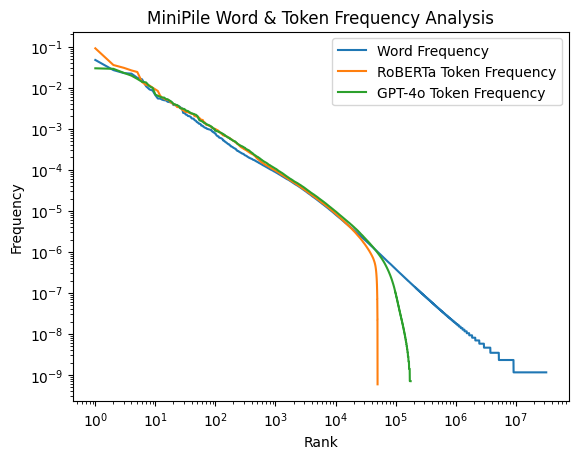

In [31]:
# 
import matplotlib.pyplot as plt
from math import log

plt.plot([key_num+1 for key_num, key in enumerate(minipile_word_frequencies)], [float(value) for key, value in minipile_word_frequencies.items()], label='Word Frequency')
plt.plot([key_num+1 for key_num, key in enumerate(minipile_roberta_token_frequencies)], [float(value) for key, value in minipile_roberta_token_frequencies.items()], label='RoBERTa Token Frequency')
plt.plot([key_num+1 for key_num, key in enumerate(minipile_gpt_token_frequencies)], [float(value) for key, value in minipile_gpt_token_frequencies.items()], label='GPT-4o Token Frequency')
# plt.title(f'MiniPile Word & Token Frequency Analysis')
plt.title(f'MiniPile Word & Token Frequency Analysis')
plt.xlabel(f'Rank')
plt.ylabel(f'Frequency')
plt.yscale(f'log')
plt.xscale(f'log')
plt.legend()
plt.show()

In [40]:
import scipy
# import scipy.stats as stats


y = [float(val) for val in minipile_gpt_token_frequencies.values()]
# dist_names = ['zipf']
dist_names = ['expon', 'lognorm']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    print(f'dist {dist_name} params: {params}')

    info = scipy.stats.kstest(y, dist_name, args=params)
    print(f'dist {dist_name} has ks p_value: {info}')


'''
bookscorpus word:
    dist expon params: (1.0153874422544972e-09, 7.589230879387788e-07)
    dist expon has ks p_value: KstestResult(statistic=np.float64(0.874332786084574), pvalue=np.float64(0.0), statistic_location=np.float64(3.0461623267634917e-08), statistic_sign=np.int8(1))
    dist lognorm params: (np.float64(18.297301550856996), np.float64(1.015387442254497e-09), np.float64(3.16838237869172e-15))
    dist lognorm has ks p_value: KstestResult(statistic=np.float64(0.3790793182058966), pvalue=np.float64(0.0), statistic_location=np.float64(2.0307748845089944e-09), statistic_sign=np.int8(-1))
minipile word:
    dist expon params: (1.1531822317963101e-09, 2.97973577529876e-08)
    dist expon has ks p_value: KstestResult(statistic=np.float64(0.8084651820516531), pvalue=np.float64(0.0), statistic_location=np.float64(3.4595466953889304e-09), statistic_sign=np.int8(1))
    dist lognorm params: (np.float64(16.849736373495528), np.float64(1.15318223179631e-09), np.float64(8.498058092906186e-21))
    dist lognorm has ks p_value: KstestResult(statistic=np.float64(0.45099315157289), pvalue=np.float64(0.0), statistic_location=np.float64(1.1531822317963101e-09), statistic_sign=np.int8(1))
'''


dist expon params: (7.034490534789096e-10, 5.604175037180939e-06)
dist expon has ks p_value: KstestResult(statistic=np.float64(0.5628115129103254), pvalue=np.float64(0.0), statistic_location=np.float64(9.932700635122203e-07), statistic_sign=np.int8(1))
dist lognorm params: (np.float64(8.247574286878852), np.float64(7.034490534789095e-10), np.float64(3.675754740524034e-08))
dist lognorm has ks p_value: KstestResult(statistic=np.float64(0.2834437997748445), pvalue=np.float64(0.0), statistic_location=np.float64(2.1103471604367286e-09), statistic_sign=np.int8(-1))


'\nbookscorpus word:\n    dist expon params: (1.0153874422544972e-09, 7.589230879387788e-07)\n    dist expon has ks p_value: KstestResult(statistic=np.float64(0.874332786084574), pvalue=np.float64(0.0), statistic_location=np.float64(3.0461623267634917e-08), statistic_sign=np.int8(1))\n    dist lognorm params: (np.float64(18.297301550856996), np.float64(1.015387442254497e-09), np.float64(3.16838237869172e-15))\n    dist lognorm has ks p_value: KstestResult(statistic=np.float64(0.3790793182058966), pvalue=np.float64(0.0), statistic_location=np.float64(2.0307748845089944e-09), statistic_sign=np.int8(-1))\nminipile word:\n    dist expon params: (1.1531822317963101e-09, 2.97973577529876e-08)\n    dist expon has ks p_value: KstestResult(statistic=np.float64(0.8084651820516531), pvalue=np.float64(0.0), statistic_location=np.float64(3.4595466953889304e-09), statistic_sign=np.int8(1))\n    dist lognorm params: (np.float64(16.849736373495528), np.float64(1.15318223179631e-09), np.float64(8.49805

In [ ]:
# TODO test if this works
from scipy.stats import zipf, kstest

y = [float(val) for val in minipile_gpt_token_frequencies.values()]
alpha = 1.103
# TODO test Dan's zipf thing
info = scipy.stats.kstest(y, zipf(alpha).cdf)
print(f'dist {dist_name} has ks p_value: {info}')




In [16]:
import numpy as np
from scipy.stats import zipf, ks_2samp, kstest
import matplotlib.pyplot as plt
import json

# Load precomputed frequency dictionaries
with open('gpt_counts.json') as f:
    gpt_counts = json.load(f)

with open('rob_counts.json') as f:
    rob_counts = json.load(f)

with open('word_counts.json') as f:
    word_counts = json.load(f)

def get_ranked_sample(freq_dict, max_rank=50000, sample_size=100000):
    items = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:max_rank]
    ranks = np.arange(1, len(items) + 1)
    freqs = np.array([count for _, count in items])
    probs = freqs / freqs.sum()
    sample = np.random.choice(ranks, size=sample_size, p=probs)
    return sample, ranks

def zipf_alpha_estimator(ranks):
    return 1 + len(ranks) / np.sum(np.log(ranks))

def ks_statistic_against_zipf(sample, alpha):
    ks_stat, _ = kstest(sample, zipf(alpha).cdf)
    return ks_stat

def run_zipf_test(freq_dict, label):
    sample, ranks = get_ranked_sample(freq_dict)
    alpha = zipf_alpha_estimator(ranks)
    ks_stat = ks_statistic_against_zipf(sample, alpha)
    print(f"{label}: α={alpha:.3f}, KS={ks_stat:.4f}")
    return ks_stat

# Run tests
print("Zipf KS Statistics:")
word_ks = run_zipf_test(word_counts, "Words")
rob_ks = run_zipf_test(rob_counts, "RoBERTa")
gpt_ks = run_zipf_test(gpt_counts, "GPT-4o")

Zipf KS Statistics:
Words: α=1.102, KS=0.3136
RoBERTa: α=1.102, KS=0.3161
GPT-4o: α=1.102, KS=0.3136
